In [2]:
#note:-in my project i used fbprophet for forecasting because its very good model for  time series analysis or forecasting
#. you can also use Arima model etc  as your wish but fbprophet is good for it



In [9]:
#libraries 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#import tensorflow as tf 
#from tensorflow import keras
#from tensorflow.keras import layers
import cv2
from fbprophet import Prophet



Importing plotly failed. Interactive plots will not work.


In [2]:
# read format of csv file you can also read excel file but you have to  excel "pd.read_excael"
df = pd.read_csv('C://Users//Ruhan Siddiqui//Downloads//novel-corona-virus-2019-dataset (2)//covid_19_data.csv',parse_dates=['Last Update'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)



In [3]:
# it show above five record on file
df.head()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0,0,0


In [4]:
# we grouped  the attribute of file  for forecasting
df_date = df.groupby(["Date"])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df_country = df.groupby(["Country"])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

date_x_ticks = []
country_x_ticks = []
date_confirmed=[]
date_deaths=[]
date_recovered=[]
country_confirmed = []
country_deaths = []
country_recovered = []

for index, row in df_date.iterrows():
    date_x_ticks.append(row['Date'])
    date_confirmed.append(row['Confirmed'])
    date_deaths.append(row['Deaths'])
    date_recovered.append(row['Recovered'])

for index, row in df_country.iterrows():
    country_x_ticks.append(row['Country'])
    country_confirmed.append(row['Confirmed'])
    country_deaths.append(row['Deaths'])
    country_recovered.append(row['Recovered'])



In [5]:
df_date.head()

,Date,Confirmed,Deaths,Recovered
0,01/22/2020,555,17,28
1,01/23/2020,653,18,30
2,01/24/2020,941,26,36
3,01/25/2020,1438,42,39
4,01/26/2020,2118,56,52


In [6]:
df_country.head()

,Country,Confirmed,Deaths,Recovered
0,Azerbaijan,1,0,0
1,"('St. Martin',)",2,0,0
2,Afghanistan,1735,39,41
3,Albania,2768,122,384
4,Algeria,6661,468,716


In [7]:
date_x_ticks = []
country_x_ticks = []
date_confirmed=[]
date_deaths=[]
date_recovered=[]
country_confirmed = []
country_deaths = []
country_recovered = []

for index, row in df_date.iterrows():

    date_x_ticks.append(row['Date'])
    date_confirmed.append(row['Confirmed'])
    date_deaths.append(row['Deaths'])
    date_recovered.append(row['Recovered'])

In [8]:
for index, row in df_country.iterrows():

    country_x_ticks.append(row['Country'])
    country_confirmed.append(row['Confirmed'])
    country_deaths.append(row['Deaths'])
    country_recovered.append(row['Recovered'])

 



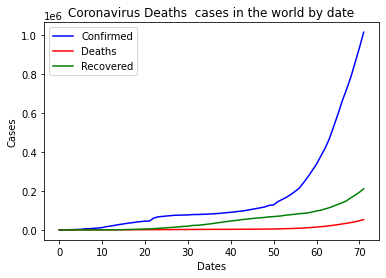

In [9]:
#plt.xticks(np.arange(len(date_x_ticks)), date_x_ticks)
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(date_confirmed, label='Confirmed', color='blue')
plt.plot(date_deaths, label='Deaths', color='red')
plt.plot(date_recovered, label='Recovered', color='green')
plt.title("Coronavirus Deaths  cases in the world by date")
plt.legend()
plt.show()

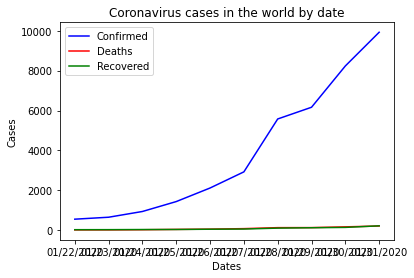

In [10]:
plt.xticks(np.arange(len(date_x_ticks[:10])), date_x_ticks[:10])
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(date_confirmed[:10], label='Confirmed', color='blue')
plt.plot(date_deaths[:10], label='Deaths', color='red')
plt.plot(date_recovered[:10], label='Recovered', color='green')
plt.title("Coronavirus cases in the world by date")
plt.legend()
plt.show()



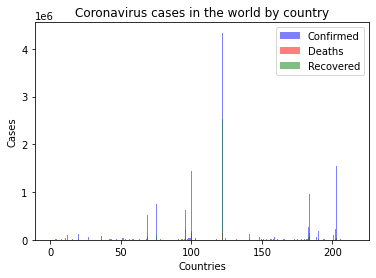

In [11]:
plt.xlabel('Countries')
plt.ylabel('Cases')
plt.bar(np.arange(len(country_confirmed)), country_confirmed, align='center', alpha=0.5, color='blue', label='Confirmed')
plt.bar(np.arange(len(country_deaths)), country_deaths, align='center', alpha=0.5, color='red', label='Deaths')
plt.bar(np.arange(len(country_recovered)), country_recovered, align='center', alpha=0.5, color='green', label='Recovered')
plt.title("Coronavirus cases in the world by country")
plt.legend()
plt.show()

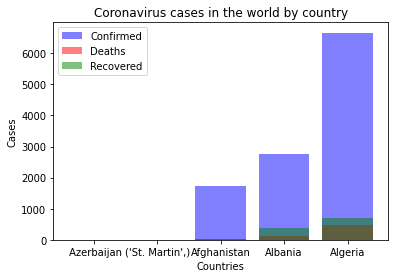

In [12]:
plt.xticks(np.arange(len(country_x_ticks[:5])), country_x_ticks[:5])
plt.bar(np.arange(len(country_confirmed[:5])), country_confirmed[:5], align='center', alpha=0.5, color='blue', label='Confirmed')
plt.bar(np.arange(len(country_deaths[:5])), country_deaths[:5], align='center', alpha=0.5, color='red', label='Deaths')
plt.bar(np.arange(len(country_recovered[:5])), country_recovered[:5], align='center', alpha=0.5, color='green', label='Recovered')
plt.xlabel('Countries')
plt.ylabel('Cases')
plt.title("Coronavirus cases in the world by country")
plt.legend()
plt.show()

 

In [14]:
date_confirmed_prophet = df_date[['Date', 'Confirmed']]
date_death_prophet = df_date[['Date', 'Deaths']]
date_recovered_prophet = df_date[['Date', 'Recovered']]

date_confirmed_prophet.columns = ['ds', 'y']
date_death_prophet.columns = ['ds', 'y']
date_recovered_prophet.columns = ['ds', 'y']



In [25]:
model_confirmed = Prophet(interval_width=0.99)
model_confirmed.fit(date_confirmed_prophet)
future_confirmed = model_confirmed.make_future_dataframe(periods=30)
forecast_confirmed = model_confirmed.predict(future_confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


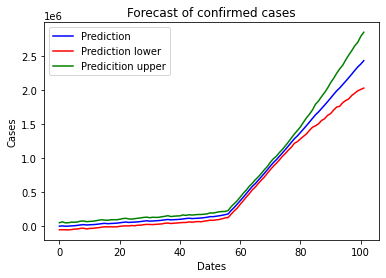

In [26]:
forecast_confirmed_yhat = []
forecast_confirmed_yhat_u = []

forecast_confirmed_yhat_l = []

for index, row in forecast_confirmed.iterrows():

    forecast_confirmed_yhat.append(row['yhat'])
    forecast_confirmed_yhat_l.append(row['yhat_lower'])
    forecast_confirmed_yhat_u.append(row['yhat_upper'])

plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(forecast_confirmed_yhat, label='Prediction', color='blue')
plt.plot(forecast_confirmed_yhat_l, label='Prediction lower', color='red')
plt.plot(forecast_confirmed_yhat_u, label='Predicition upper', color='green')
plt.title("Forecast of confirmed cases")
plt.legend()
plt.show()

In [31]:
model_death = Prophet(interval_width=0.99)
model_death.fit(date_death_prophet)
future_death = model_death.make_future_dataframe(periods=30)
forecast_death = model_death.predict(future_death)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


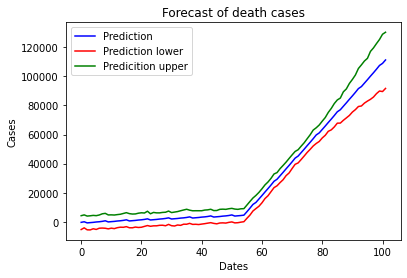

In [32]:
forecast_death_yhat = []
forecast_death_yhat_u = []

forecast_death_yhat_l = []

for index, row in forecast_death.iterrows():

    forecast_death_yhat.append(row['yhat'])
    forecast_death_yhat_l.append(row['yhat_lower'])
    forecast_death_yhat_u.append(row['yhat_upper'])
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(forecast_death_yhat, label='Prediction', color='blue')
plt.plot(forecast_death_yhat_l, label='Prediction lower', color='red')
plt.plot(forecast_death_yhat_u, label='Predicition upper', color='green')
plt.title("Forecast of death cases")
plt.legend()
plt.show()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


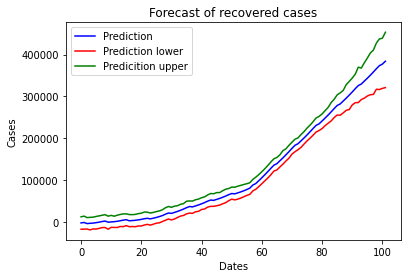

In [33]:
model_recovered = Prophet(interval_width=0.99)
model_recovered.fit(date_recovered_prophet)
future_recovered = model_recovered.make_future_dataframe(periods=30)
forecast_recovered = model_recovered.predict(future_recovered)

dates_forecast_recovered = []
forecast_recovered_yhat = []
forecast_recovered_yhat_u = []
forecast_recovered_yhat_l = []

for index, row in forecast_recovered.iterrows():
    dates_forecast_recovered.append(row['ds'])
    forecast_recovered_yhat.append(row['yhat'])
    forecast_recovered_yhat_l.append(row['yhat_lower'])
    forecast_recovered_yhat_u.append(row['yhat_upper'])

plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(forecast_recovered_yhat, label='Prediction', color='blue')
plt.plot(forecast_recovered_yhat_l, label='Prediction lower', color='red')
plt.plot(forecast_recovered_yhat_u, label='Predicition upper', color='green')
plt.title("Forecast of recovered cases")
plt.legend()
plt.show()

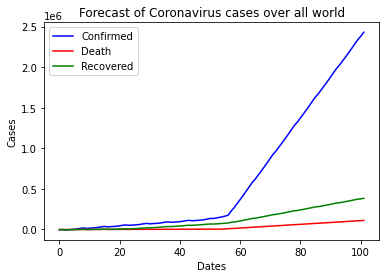

In [34]:
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(forecast_confirmed_yhat, label='Confirmed', color='blue')
plt.plot(forecast_death_yhat, label='Death', color='red')
plt.plot(forecast_recovered_yhat, label='Recovered', color='green')
plt.title("Forecast of Coronavirus cases over all world")
plt.legend()
plt.show()

In [35]:
date_confirmed_prophet_y = []
date_recovered_prophet_y = []
date_death_prophet_y = []

for index, row in date_confirmed_prophet.iterrows():
    date_confirmed_prophet_y.append(row['y'])
for index, row in date_death_prophet.iterrows():
    date_death_prophet_y.append(row['y'])
for index, row in date_recovered_prophet.iterrows():
    date_recovered_prophet_y.append(row['y'])



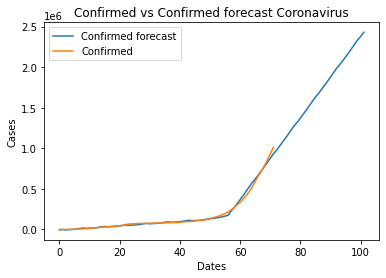

In [36]:
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(forecast_confirmed_yhat, label = 'Confirmed forecast')
plt.plot(date_confirmed_prophet_y, label = 'Confirmed')
plt.title("Confirmed vs Confirmed forecast Coronavirus")
plt.legend()
plt.show()

 



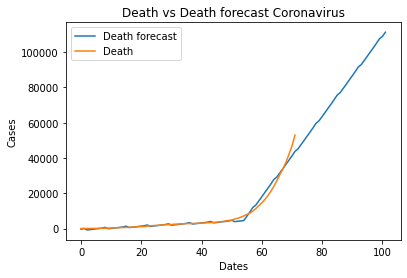

In [37]:
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(forecast_death_yhat, label = 'Death forecast')
plt.plot(date_death_prophet_y, label = 'Death')
plt.title("Death vs Death forecast Coronavirus")
plt.legend()
plt.show()



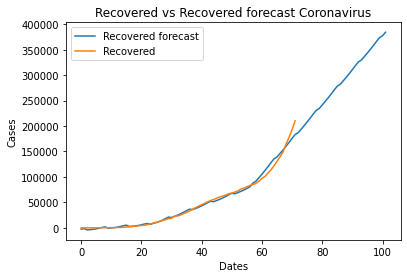

In [38]:
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(forecast_recovered_yhat, label = 'Recovered forecast')
plt.plot(date_recovered_prophet_y, label = 'Recovered')
plt.title("Recovered vs Recovered forecast Coronavirus")
plt.legend()
plt.show()



In [39]:
# if you have update dataset of covid-19 ,you can also try here
#if you have any query then you can ask me with the help of pull request 